# Flux Redshift SED model

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- Creation date : February 28th 2021
- Update : October 23th 2021
- **CCIN2P3 : kernel anaconda3pbspzrail**


- ln -s ../tmp


- Last verification : January 5th 2022

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,5)
import scipy.stats
import sys
import os
sys.path.append('../')
from delight.io import *
from delight.utils import *
from delight.photoz_gp import PhotozGP

In [2]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [3]:
from delight.io import *
from delight.utils import *

In [4]:
#basedelight_datapath="../tmp/delight_indata" 
basedelight_datapath = "../../../data" 

In [5]:
#topdir=os.path.join(basedelight_datapath,"CWW_SEDs")
topdir=os.path.join(basedelight_datapath,"SED")

In [6]:
configfilename="tmp/parametersTest.cfg"

In [7]:
files_sed_cww=["El_B2004a_fluxredshiftmod.txt","SB2_B2004a_fluxredshiftmod.txt","Sbc_B2004a_fluxredshiftmod.txt",
               "ssp_25Myr_z008_fluxredshiftmod.txt","Im_B2004a_fluxredshiftmod.txt","SB3_B2004a_fluxredshiftmod.txt",
               "Scd_B2004a_fluxredshiftmod.txt","ssp_5Myr_z008_fluxredshiftmod.txt"]

In [8]:
NSED=len(files_sed_cww)
NSED

8

In [9]:
# decode the parameters
params = parseParamFile(configfilename, verbose=False, catFilesNeeded=False)
bandNames = params['bandNames']
dir_seds = params['templates_directory']
dir_filters = params['bands_directory']
lambdaRef = params['lambdaRef']
sed_names = params['templates_names']
fmt = '.dat'
  

#redshift grid
redshiftDistGrid, redshiftGrid, redshiftGridGP = createGrids(params)
numZ = redshiftGrid.size

In [10]:
bandNames

['DC2LSST_u', 'DC2LSST_g', 'DC2LSST_r', 'DC2LSST_i', 'DC2LSST_z', 'DC2LSST_y']

In [11]:
index = 0

In [12]:
filename=files_sed_cww[index]

In [13]:
filename.split("_fluxredshiftmod")

['El_B2004a', '.txt']

In [14]:
fullfilename=os.path.join(topdir,filename)

In [15]:
flux=np.loadtxt(fullfilename)

In [16]:
flux.shape

(300, 6)

In [17]:
colorflux= ['b','g','r','orange','grey','k']

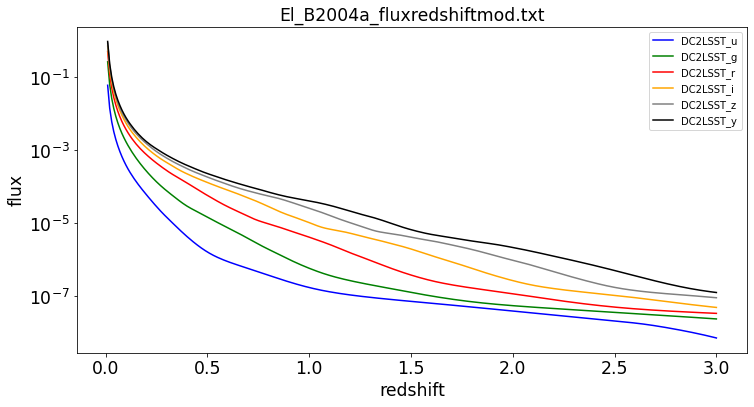

In [18]:
for ifilt in np.arange(6):
    plt.plot(redshiftGrid,flux[:,ifilt],color=colorflux[ifilt],label=bandNames[ifilt])
plt.yscale("log")
plt.xlabel("redshift")
plt.ylabel("flux")
plt.title(filename)
plt.legend()

# A) Filter - Redshift Model 

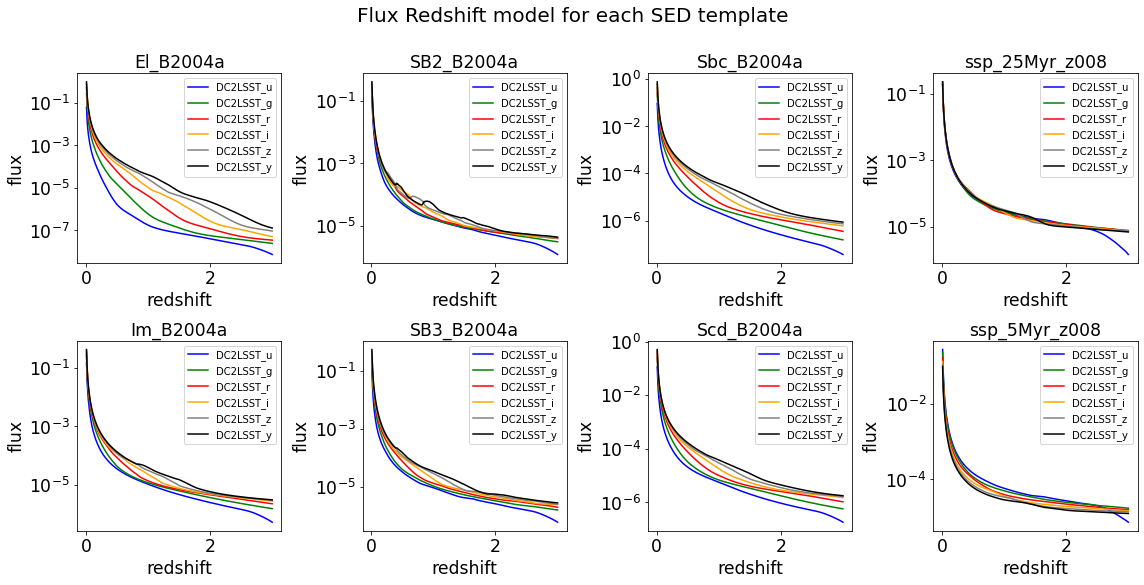

In [19]:
fig=plt.figure(figsize=(16,8))
ncol=4
nrow=2

iframe0=nrow*100+ncol*10

for ised in np.arange(NSED):
    iframe=iframe0+ised+1
    ax=fig.add_subplot(iframe)
    filename=files_sed_cww[ised]
    sedname=filename.split("_fluxredshiftmod")[0]
    fullfilename=os.path.join(topdir,filename)
    flux=np.loadtxt(fullfilename)
    for ifilt in np.arange(6):
        ax.plot(redshiftGrid,flux[:,ifilt],color=colorflux[ifilt],label=bandNames[ifilt])
    ax.set_yscale("log")
    ax.set_xlabel("redshift")
    ax.set_ylabel("flux")
    ax.set_title(sedname)
    ax.legend()
    
plt.suptitle("Flux Redshift model for each SED template",y=1.01,fontsize=20)
plt.tight_layout()
    

In [20]:
#for ifilt in np.arange(6):
#    print(ifilt,ifilt//3,ifilt-(ifilt//3)*3)

# B) Compare the Fluxes SED in the same filter

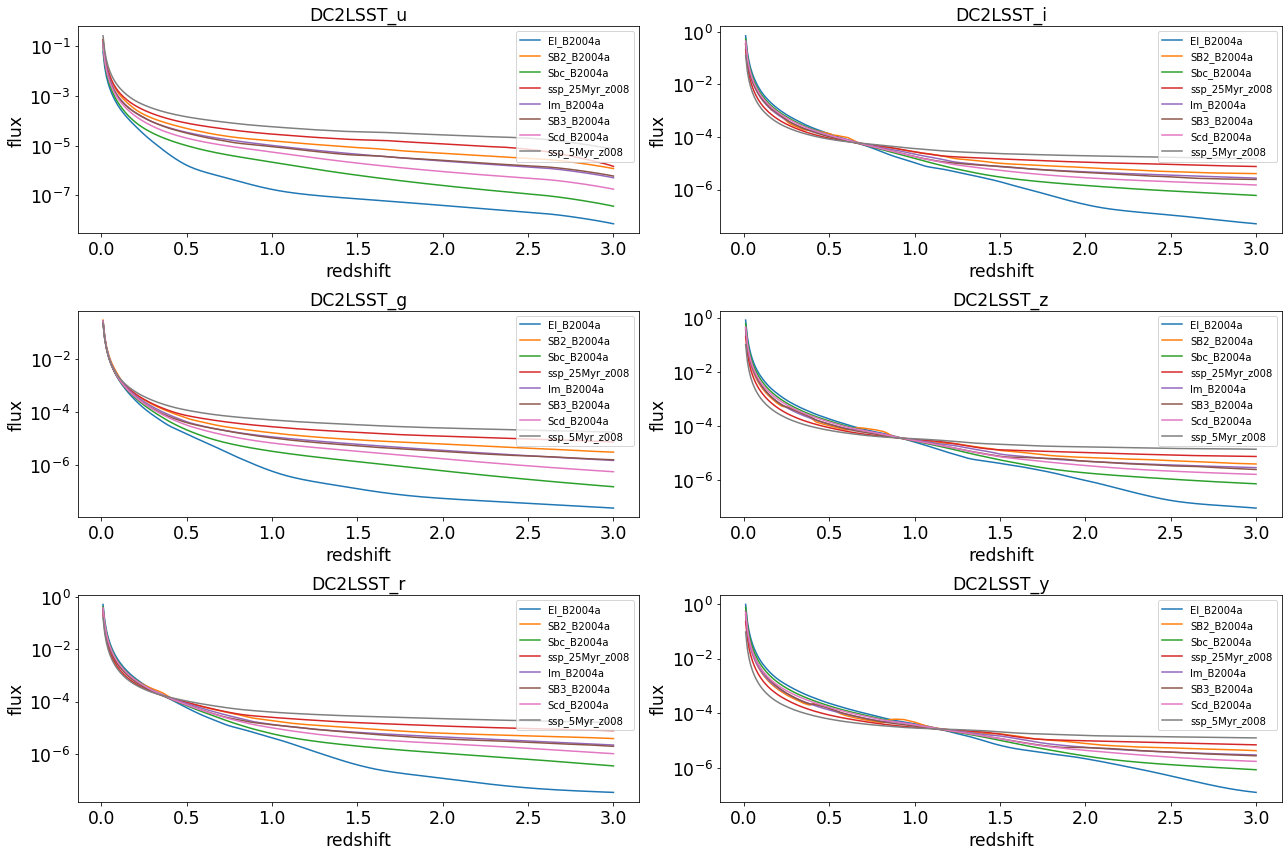

In [21]:
ncol=2
nrow=3
fig, axes = plt.subplots(nrow, ncol,figsize=(18,12)) 

for ised in np.arange(NSED):
    filename=files_sed_cww[ised]
    sedname=filename.split("_fluxredshiftmod")[0]
    fullfilename=os.path.join(topdir,filename)
    flux=np.loadtxt(fullfilename)
    for ifilt in np.arange(6):
        ix=ifilt//3
        iy=ifilt-ix*3
        
        axes[iy,ix].plot(redshiftGrid,flux[:,ifilt],label=sedname)
        axes[iy,ix].legend(loc="upper right")
        if ised==0:
            axes[iy,ix].set_yscale("log")
            axes[iy,ix].set_title(bandNames[ifilt])
            axes[iy,ix].set_xlabel("redshift")
            axes[iy,ix].set_ylabel("flux")
            
plt.tight_layout()
            